# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Data

In [2]:
data = pd.read_excel('Power.xlsx')

data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Variables

In [3]:
X = data['V'].values

y = data['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model - Linear regression

### Linear regression

In [4]:
linear_regression = LinearRegression()

linear_regression.fit(X_train.reshape(-1,1), y_train)

y_pred = linear_regression.predict(X_test.reshape(-1,1))

### Results - Visualizing model

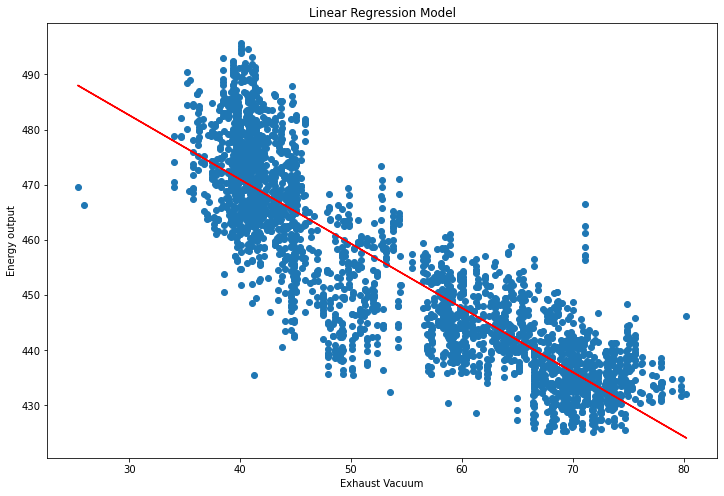

In [5]:
plt.figure(figsize=(12, 8))

plt.scatter(X_test.reshape(-1,1), y_test)

plt.plot(X_test.reshape(-1,1), y_pred, color='red')

plt.title('Linear Regression Model')

plt.xlabel('Exhaust Vacuum')

plt.ylabel('Energy output')

plt.show()

### Results - Model evaluation

In [6]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rsq = r2_score(y_test, y_pred)

print('RMSE:', rmse)

print('\nR Square:', rsq)

RMSE: 8.372069372442052

R Square: 0.7605434835922228


### Results - Model equation

In [7]:
slope_coef = linear_regression.coef_

intercept =  linear_regression.intercept_

print('Slope coefficient:', slope_coef)

print('\nIntercept:', intercept)

Slope coefficient: [-1.16492541]

Intercept: 517.5640699090177


# Model - Polynomial regression

### Generate polynomial features

In [8]:
polynomial_features = PolynomialFeatures(degree=2)

X_train_poly = polynomial_features.fit_transform(X_train.reshape(-1,1))
X_test_poly = polynomial_features.fit_transform(X_test.reshape(-1,1))

### Polynomial regression

In [9]:
polynomial_regression = LinearRegression()

polynomial_regression.fit(X_train_poly, y_train)

y_pred = polynomial_regression.predict(X_test_poly)

### Results - Visualizing model

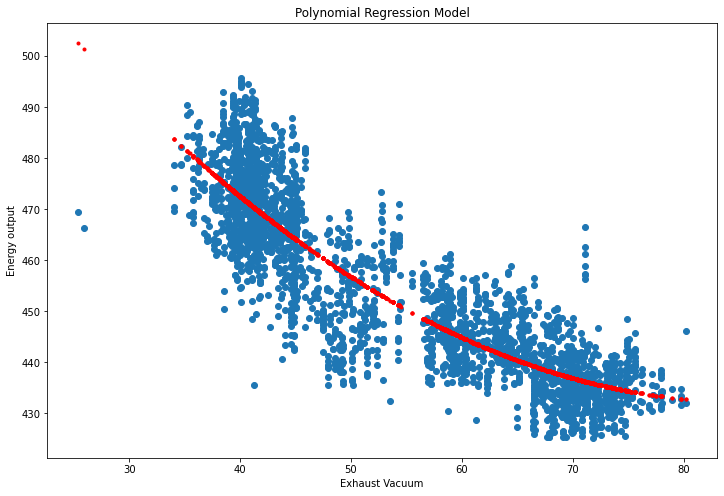

In [10]:
plt.figure(figsize=(12, 8))

plt.scatter(X_test.reshape(-1,1), y_test)

plt.scatter(X_test.reshape(-1,1), y_pred,marker='.', c='red')

plt.title('Polynomial Regression Model')

plt.xlabel('Exhaust Vacuum')

plt.ylabel('Energy output')

plt.show()

### Results - Model evaluation

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rsq = r2_score(y_test, y_pred)

print('RMSE:', rmse)

print('\nR Square:', rsq)

RMSE: 8.03040728999448

R Square: 0.7796890066407937


### Results - Model equation

In [12]:
slope_coef = polynomial_regression.coef_[1:]

intercept =  polynomial_regression.intercept_

print('Slope coefficient:', slope_coef)

print('\nIntercept:', intercept)

Slope coefficient: [-3.33248864  0.01949985]

Intercept: 574.6229380737559
